<a href="https://colab.research.google.com/github/maguid28/CE4051-IntroToDataEngineering/blob/main/Etivity1_2_3_Probability_23222425.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Student Details

Student Name: Daniel Maguire

Student ID: 23222425

# Task 2: Probability Theory

## Option ? a). Discrete Random Variable with Uniform Distribution and b). Continuous random variable with Normal Distribution.


(Describe the task)
### a). Will it rain tomorrow?

We're in Ireland, so let's assume that the probability of rain on any given day is quite high.

We have a simple model to represent the intensity of the rain, in this simple example each outcome is equally likely (uniform distribution), with four possible outcomes (discrete random variable):

  0: No Rain

  1: Light Rain

  2: Moderate Rain

  3: Heavy Rain

### b). How long will I wait for the bus in the morning?

Assume that the waiting time (continuous random) for a bus in the morning follows a Normal Distribution. It has a mean waiting time of 10 minutes, where some days it is early and other days it is late. It also has a standard deviation of 3 minutes.




## Approach

(Describe the approach you took. Describe also how you used the feedback from the forums to improve your code).

### a). The rain_simulation function simulates the rain intensity in Ireland.
It randomly chooses a value from the set [0, 1, 2, 3] where:

    0 represents "No Rain"
    1 represents "Light Rain"
    2 represents "Moderate Rain"
    3 represents "Heavy Rain"

The function returns an array of size n with these outcomes.
The simulation is run 1000 times.

The mean rain intensity and its standard deviation are calculated.

The results are printed and a histogram is plotted using pyplot to visualize the frequency of the rain intensity.




### b). The bus_waiting_simulation function simulates the waiting time for a bus.

  It generates random numbers from a normal distribution with a mean of 10 minutes and a standard deviation of 3 minutes.
  
  The function returns an array of size n waiting times.

  The simulation is run n = 10000 times.
  The expected waiting time (mean) and its standard deviation are calculated.
  A histogram is used to visualize the distribution of waiting times and the results are printed.

  

## Manual Calculations

(Provide details of the manual calculations)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### a). Will it rain tomorrow?

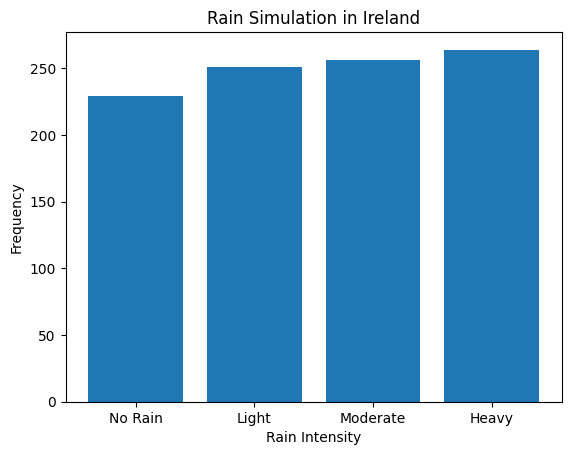

Expected Rain Intensity: 1.555
Standard Deviation of Rain Intensity: 1.110394074191681


In [ ]:

def rain_simulation(n):
    outcomes = np.random.choice([0, 1, 2, 3], size=n)
    return outcomes

number_of_iterations1 = 1000
rain_results = rain_simulation(number_of_iterations1)
expected_rain = np.mean(rain_results)
std_rain = np.std(rain_results)

plt.hist(rain_results, bins=[0, 1, 2, 3, 4], align='left', rwidth=0.8)
plt.title("Rain Simulation in Ireland")
plt.xlabel("Rain Intensity")
plt.ylabel("Frequency")
plt.xticks([0, 1, 2, 3], ["No Rain", "Light", "Moderate", "Heavy"])
plt.show()

print(f"Expected Rain Intensity: {expected_rain}")
print(f"Standard Deviation of Rain Intensity: {std_rain}")


### b). How long will I wait for the bus in the morning?

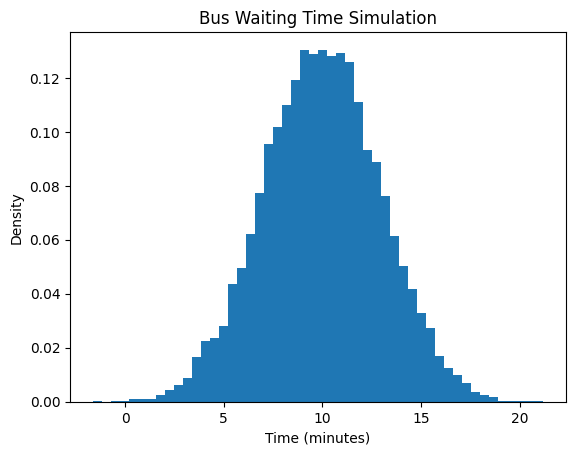

Expected Waiting Time: 9.977379119048221 minutes
Standard Deviation of Waiting Time: 2.9696983181711034 minutes


In [ ]:
def bus_waiting_simulation(n):
    mean_time = 10
    std_time = 3
    return np.random.normal(mean_time, std_time, n)

n = 10000
waiting_times = bus_waiting_simulation(n)
expected_waiting_time = np.mean(waiting_times)
std_waiting_time = np.std(waiting_times)

plt.hist(waiting_times, bins=50, density=True)
plt.title("Bus Waiting Time Simulation")
plt.xlabel("Time (minutes)")
plt.ylabel("Density")
plt.show()

print(f"Expected Waiting Time: {expected_waiting_time} minutes")
print(f"Standard Deviation of Waiting Time: {std_waiting_time} minutes")

# Task 3: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [ ]:
# import dependencies
import numpy as np
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_genders.csv',header=0)

# Show just the first few samples so we know it's read correctly
data.head(n=3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


### Visualise

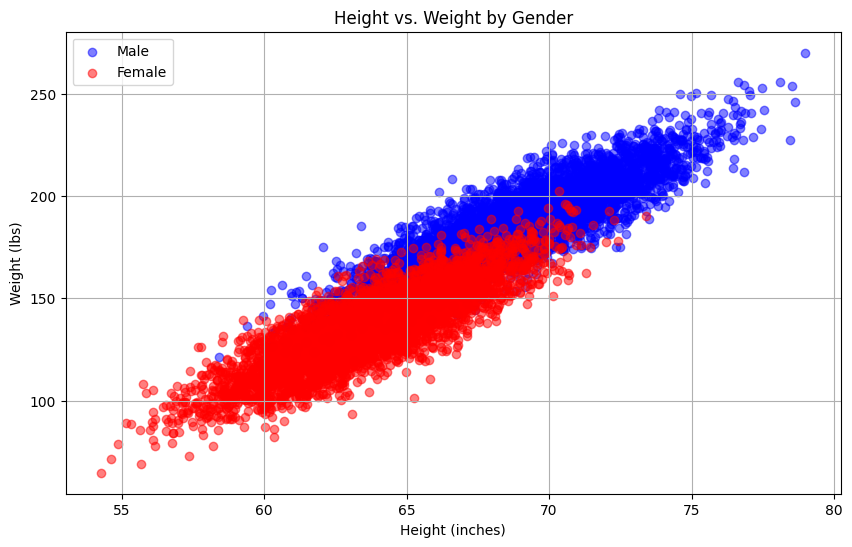

In [ ]:
plt.figure(figsize=(10, 6))
males = data[data['Gender'] == 'Male']
females = data[data['Gender'] == 'Female']

plt.scatter(males['Height'], males['Weight'], color='blue', label='Male', alpha=0.5)
plt.scatter(females['Height'], females['Weight'], color='red', label='Female', alpha=0.5)

plt.title('Height vs. Weight by Gender')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')
plt.legend()
plt.grid(True)
plt.show()


\###### Discuss: Do you think there is resonable separation?

Yes, there looks to be reasonable seperation as we can see that women tend to be weigh less and their height tends to be smaller, whereas male data points are clustered in a region with higher heights and weights compared to female data points, so I believe this it indicates a clear distinction.

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [ ]:
X = data.iloc[:,1:3] # X is the features in our dataset
y = data.iloc[:,0]   # y is the Labels in our dataset

### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting.

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

In [ ]:
from sklearn.model_selection import train_test_split

# Split out training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Training data size: {len(X_train)}")
print(f"Test data size: {len(X_test)}")


Training data size: 8000
Test data size: 2000


### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

classifier.fit(X_train, y_train)


GaussianNB()

### Test the algorithm
Using the test data

In [ ]:
from sklearn.metrics import accuracy_score

# predict the genders for test data
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the GaussianNB model: {accuracy*100}%")


Accuracy of the GaussianNB model: 88.75%


### Plot the random samples

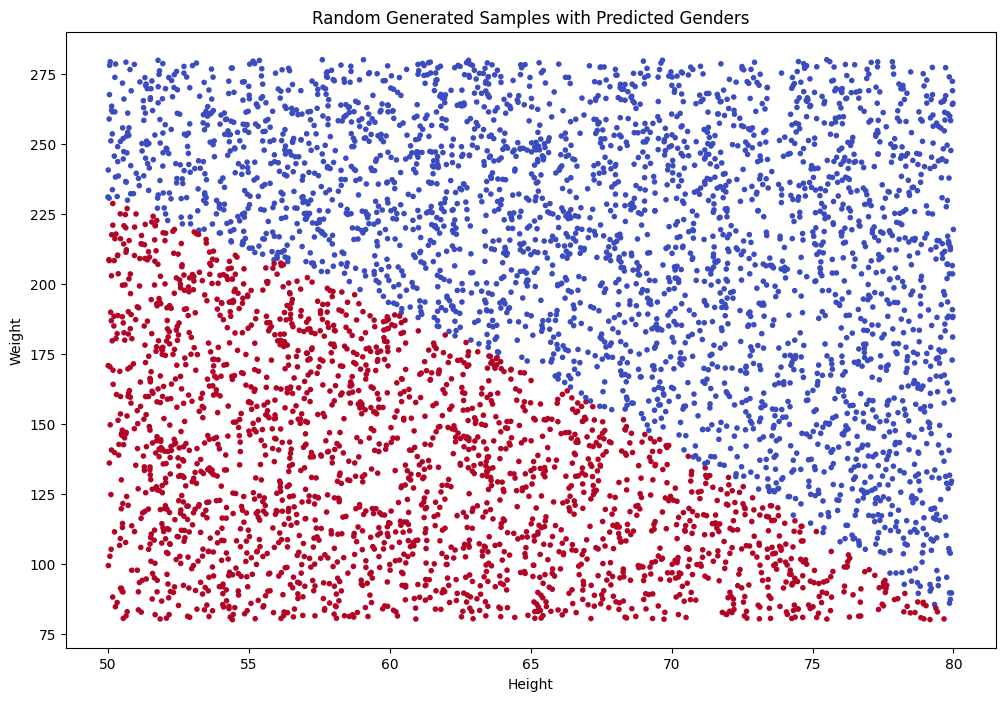

In [ ]:
import numpy as np

height_range = (50, 80)
weight_range = (80, 280)

# Generate 5000 random samples
random_heights = np.random.uniform(height_range[0], height_range[1], 5000)
random_weights = np.random.uniform(weight_range[0], weight_range[1], 5000)

random_samples = pandas.DataFrame({'Height': random_heights, 'Weight': random_weights})

# trained model predicts the random samples gender
predicted_genders = classifier.predict(random_samples)

# Convert to binary format for visualization
predicted_genders_binary = []

for gender in predicted_genders:
    # If Male, append 0 to the list
    if gender == 'Male':
        predicted_genders_binary.append(0)
    # Otherwise, append 1 to the list
    else:
        predicted_genders_binary.append(1)

plt.figure(figsize=(12, 8))
plt.scatter(random_samples['Height'], random_samples['Weight'], c=predicted_genders_binary, cmap='coolwarm', marker='.')
plt.title('Random Generated Samples with Predicted Genders')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

#Task 4: Exploration

##Applications of Reinforcement Learning

I believe the most defining feature of reinforcement learning is its ability to learn from interactions with an environment. Unlike supervised learning, where labeling of data is required, Reinforcement Learning agents learn by trial and error. This makes Reinforcement Learning incredibly effective where the optimal result is not known prior. This leaves a wide range of applications for RL to excel at. An interesting example that I previous discovered was in the field of robotics where DeepMind is training robots to play games of football competitively. What was interesting about this was it was experimenting with multi-agent RL, where multiple agents learn to interact with their environment and with each other, which are a part of the each agents environment. Over time emergent traits start to show that would not have normally show up in a single agent environment i.e. collaborative strategies between the agents, or competitive moves or strategies that they can learn when coming in contact with competition.

For example, two agents on the same team may develop a strategy to pass the ball between them to evade opponents. This collaborative strategy emerges as a result of the agents realizing the benefits of team work to achieve their shared goal. Using another example, when agents from opposing teams come into contact, they might develop competitive strategies to "outwit" each other. These strategies evolve over time as agents learn from their successes and failures. Some of the emergent behaviours were described as "agents acquired skills including agile locomotion, passing, and division of labour as demonstrated by a range of statistics, including metrics used in real-world sports analytics. The players exhibit both agile high-frequency motor control and long-term decision-making that involves anticipation of teammates’ behaviours, leading to coordinated team play." (Deepmind, 2022)

Reinforcement is applicable to Deepminds football robots as it allows the potential for agents to develop emergent traits that would not have been possible if they were limited to supervised or unsupervised learning. With supervised or unsupervised learning the output can never be better than the provided training data, but with RL the model accuracy can continue past the accuracy of any trained data as it works using a reward and punishment approach.

The power of RL, which is even more prevalent in multi-agent settings, is the unpredictability of the outcomes. The agents are not pre-programmed with specific strategies or behaviors. Instead they develop these strategies organically as they interact with the environment and other agents. This leads to the emergence of new strategies that might never have been conceived by humans.


###References

From motor control to embodied intelligence. (2022). Deepmind. Available at: https://www.deepmind.com/blog/from-motor-control-to-embodied-intelligence (Accessed: 20 September 2023)